
                                                SKILL ACTIVITY NO: 3
    Date: 11/07/2021
    Name: Aditi Rajesh Dalavi
    Email_id: aditidalavi7337@gmail.com
    Module Code: ML_13

                                            Title: Analysis of auto data.

Skills/Competencies to be acquired:

   1. Accepting values from users
   2. Creating function for input validation of the data
   3. Use of Control statement 
   4. To do Descriptive analysis. 
   5. Interpret the data. Find the frequency distribution of the data. 
   6. Find central tendency and measures of spread.Interpret it. 
   7. Find skewness and Kurtosis. Interpret it.
   8. Inferential analysis.Interpret it.
   9. Homoscedacity
   10. Linear regression. Interpret it.
    

What is the purpose of this activity?

    Implementation of the control statements
    Creating functions to avoid repetition of the same logic 
    Creating user defined errors.Create function for input validation of the data.
    Use of Control statement. To do Descriptive analysis. Find the frequency distribution of the data.  
    Find central tendency and measures of spread.Interpret it. 
    Find skewness and Kurtosis.Inferential analysis.Interpret it. Linear regression. Interpret it.

Steps performed in this activity.

    Read the data. 
    Import the required libraries. 
    Analyise the data and explore the data. Plot the distributions of each exploration. 
    Find central tendency and measures of spread.Interpret it. 
    Find skewness and Kurtosis. Interpret it.
    Inferential analysis.Interpret it.
    linear regression

What resources / materials / equipment / tools did you use for this activity?

    Python, matplotlib, sklearn,stats, scipy etc
What skills did you acquire?

    Developing logic 
    Checking  all loopholes while executing the code.

Time taken to complete the activity?

    2 days.


In [1]:
import time
import random
from math import *
import operator
import numpy as np
import pandas as pd
import statistics as stat

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sys
sys.set(style='white',color_codes=True)
sys.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression

from statsmodels.tools.eval_measures import rmse

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sa
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import researchpy as rp
from scipy import stats

In [2]:
# read the dataset:
auto= pd.read_csv(r"C:\Users\aditi\Desktop\ML 13\ml pandas\New folder\datasets\Auto.csv")

In [3]:
# check 1st 5 rows:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#check last 5 rows:
auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
#check no of rows and columns.
auto.shape

(397, 9)

#### There are 397 rows and 9 columns.

In [6]:
#check the data types and columns index wise non-null count.
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


#### This data set has 3 float , 4 integer, and 2 object data types.
#### No null value present in the data.

In [7]:
### index of the columns:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

#### 8 columns are present 

In [8]:
# check null value for confirmation:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

#### no null value in the data.

In [9]:
# check unique values:
auto.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          350
acceleration     95
year             13
origin            3
name            304
dtype: int64

#### Miles per gallon has 129 unique values & Cylinder has 5 unique values.
#### Displacement has 82 unique values & Horsepower has 94 unique values.
#### Weight has 350 unique values & Acceleration has 95 unique values.
#### Year has 13 unique values & Origin has 3 unique values.
#### Name has 304 unique values.

#### after seeing all values, grouping can be done with the help of origin, year, cylinders.

In [10]:
# value count of cylinder:
auto['cylinders'].value_counts()

4    203
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

#### 5 different types of cylinders are present in the given data.
#### data type is of integer.

C:\Users\aditi\anaconda_7june\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CYLINDERS Vs COUNT')

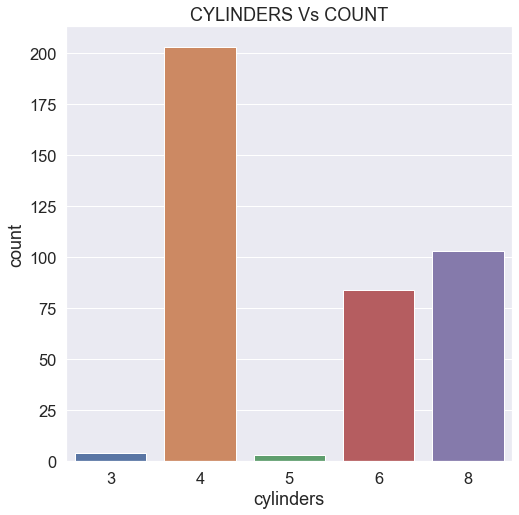

In [11]:
# ploting countplot of cylinder vs count:
plt.figure(figsize=(8,8))

sys.countplot(auto['cylinders'])
plt.title('CYLINDERS Vs COUNT')


####  In this given data:
#### 3 cylinder engine car , 4 cylinder engine car, 5 cylinder engine car, 6 cylinder engine car, 8 cylinder engine car are present.
#### maximum no of cars are of 4 cylinder engine and less number of cars are of 5 cylinder engine and 3 cylinder engine car.




In [12]:
# value count of year:
auto['year'].value_counts()

73    40
78    36
76    34
75    30
82    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: year, dtype: int64

#### in given data, car models are from 1970 to 1982.
#### data type is of integer.

C:\Users\aditi\anaconda_7june\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'YEAR VS COUNT'}, xlabel='year', ylabel='count'>

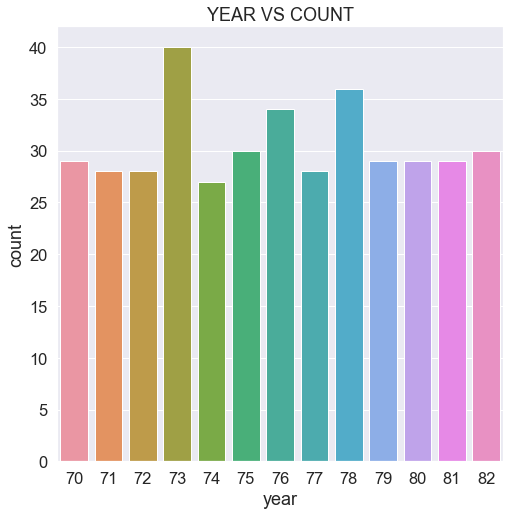

In [13]:
# plotting countplot of year vs count:
plt.figure(figsize=(8,8))
plt.title('YEAR VS COUNT')
sys.countplot(auto['year'])


#### In this given data,
#### car models are from 1970 to 1982.
#### maximum number of cars are from 1973 and minimum number of cars are from 1974.
#### 1975 and 1982 model cars are of same count.
#### 1970, 1979, 1980, 1981 model cars are of same count.
#### 1971,1972,1977 model cars are of same count.

In [14]:
# value count of origin:
origin=auto['origin'].value_counts()
origin

1    248
3     79
2     70
Name: origin, dtype: int64

#### 3 origins are present in te given data.
#### data type is of integer.

Text(0.5, 1.0, 'ORIGIN DISTRIBUTION OF CARS')

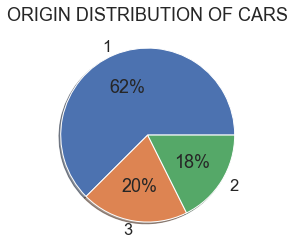

In [15]:
# plotting pie diagram of origin:
label= [1,3,2]
color=['green','red','yellow']
plt.pie(origin,
       startangle=0,
       labels=label,
       shadow=True,
       autopct='%1.0f%%')
plt.title('ORIGIN DISTRIBUTION OF CARS')

#### In this data,
#### 3 origins are there.
#### origin 1 has maximum number of cars.
#### origin 2 and origin 3 has almost same number of cars

## ACCELERATION:

In [16]:
# displaying acceleration from given data:
acceleration = auto['acceleration'].astype(int)
acceleration

0      12
1      11
2      11
3      12
4      10
       ..
392    15
393    24
394    11
395    18
396    19
Name: acceleration, Length: 397, dtype: int32

In [17]:
# displaying index of acceleration:
acc = (acceleration.index).astype(int)
acc

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
           dtype='int64', length=397)

In [18]:
#describing acceration:
auto['acceleration'].describe()

count    397.000000
mean      15.555668
std        2.749995
min        8.000000
25%       13.800000
50%       15.500000
75%       17.100000
max       24.800000
Name: acceleration, dtype: float64

#### Acceleration: 
#### maximum acceleration in given data is 24.80 units.
#### minimum acceleration in given data is 8 units.
#### From mean 15.55, acceleration is deviated by 2.74.


## 

## Quantiles of acceleration:

In [19]:
# quantile of 25% of accleration:
qa1 = auto['acceleration'].quantile(0.25)
qa1

13.8

#### Quantile of 25% of acceleration is 13.775

In [20]:
# quantile of 50% of acceleration:
qa2 = auto['acceleration'].quantile(0.50)
qa2

15.5

#### Quantile of 50% of acceleration is 15.5

In [21]:
# quantile of 75% of acceleration:
qa3 = auto['acceleration'].quantile(0.75)
qa3

17.1

#### Quantile of 75% of acceleration is 17.025

In [22]:
#inter-quantile region of acceleration:
IQR_A= qa3-qa1
IQR_A

3.3000000000000007

#### Inter-Quantile of acceleration is 3.24.

In [23]:
# lower bound of acceleration:
lb_a = qa1-(1.5*IQR_A)
lb_a

8.85

#### lower bound of acceleration is 8.90

In [24]:
# upper bound of acceleration:
ub_a = qa3+(1.5*IQR_A)
ub_a

22.050000000000004

#### upper bound of acceleration is 21.89

In [25]:
# calculating skewness of acceleration before removing outliers:
auto['acceleration'].skew()

0.2808175010382629

#### Skewness is fairly symmetrical.It is positive, hence right side tail is longer.

In [26]:
# calculating kurtosis of acceleration before removing outliers:
auto['acceleration'].kurt()

0.4455252633429918

#### Kurtosis is approximately zero, hence its slightly pointy to normal distriburtion. there is lack of outliers too.

C:\Users\aditi\anaconda_7june\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ACCELERATION VS DENSITY')

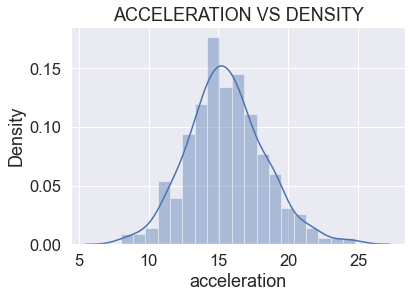

In [27]:
# plotting distplot of acceleration before removing outlier:
sys.distplot(auto['acceleration'])
plt.title('ACCELERATION VS DENSITY')

#### Right side tail is a bit longer, and it is normally distributed.

In [28]:
# checking outliers:
var_a= acceleration [(acceleration<lb_a)| (acceleration>ub_a)].index

var_a

Int64Index([7, 9, 11, 59, 299, 326, 393], dtype='int64')

### outliers are present.

Text(0.5, 1.0, 'Box plot of acceleration')

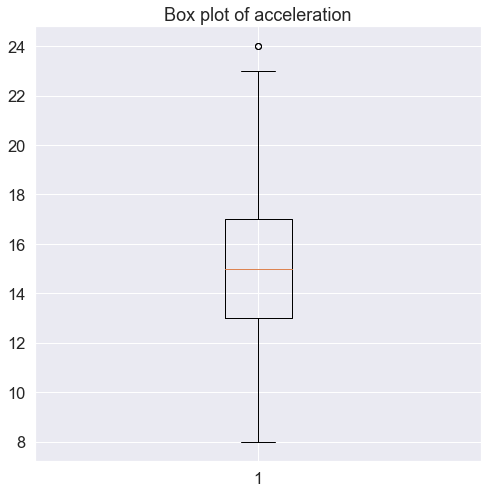

In [29]:
# plotting boxplot of acceleration to check the location of outliers:
plt.figure(figsize=(8,8))
plt.boxplot(acceleration);
plt.title('Box plot of acceleration')

#### Outliers are present near minimum of acceleration.

In [30]:
# removing outliers from acceleration:
acceleration.drop(index= var_a, inplace=True)

Text(0.5, 1.0, 'Box plot of acceleration')

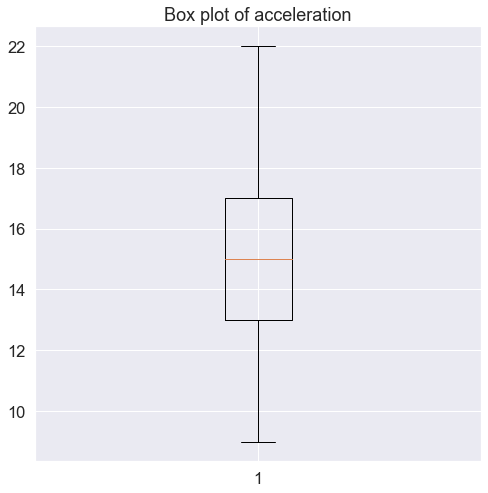

In [31]:
# checking wheather outliers are removed or not:
plt.figure(figsize=(8,8))
plt.boxplot(acceleration);
plt.title('Box plot of acceleration')

#### outlier is removed.

In [32]:
# calculating skewness of acceleration after removing outliers:
acceleration.skew()

0.23526334303807253

#### skewness is positive and fairly skewed. it is approximately 0 hence it is symmetric.

In [33]:
# calculating kurtosis of acceleration after removing outliers:
acceleration.kurt()

-0.18937830823374346

#### kurtosis is negative and approximately zero. hence it is slighly flat and it is normal distribution.

C:\Users\aditi\anaconda_7june\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ACCELERATION VS DENSITY')

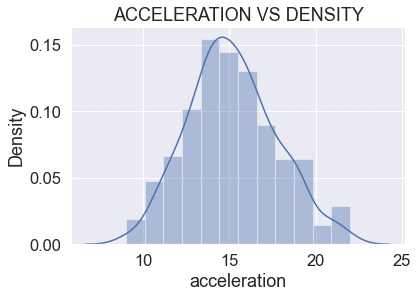

In [34]:
# plotting distplot of acceleration:
sys.distplot(acceleration)
plt.title('ACCELERATION VS DENSITY')

#### peak is slightly flat and it is normal distribution.

## HORSEPOWER:

In [35]:
#displaying horsepower from given data:
horsepower= auto['horsepower']
horsepower

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

#### data type of horsepower is object, string maybe present in this data type. 

In [36]:
#displaying the index of horsepower:
index_h = auto['horsepower'].index
index_h

RangeIndex(start=0, stop=397, step=1)

#### the length of horsepower is of 392.

In [37]:
# checking the string in the dataframe of horsepower:
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

#### Horsepower contains '?' .
#### This need to be convert into numeric.

In [38]:
#converting the string in data into numeric form:
auto= auto[auto.horsepower != '?']
auto['horsepower']=pd.to_numeric(auto['horsepower'])

In [39]:
# Checking the conversion:
auto['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

#### Horsepower is converted into integer data type. Hence has no string value in it

In [40]:
hp=auto['horsepower']
hp

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 392, dtype: int64

In [41]:
# as the dtype is changed into int hence describing it:
auto['horsepower'].describe().astype(int)

count    392
mean     104
std       38
min       46
25%       75
50%       93
75%      126
max      230
Name: horsepower, dtype: int32

#### HORSEPOWER:
#### the mean of horsepower is 104.
#### maximum horsepower in given data is 230 units.
#### minimum horsepower in given data is 46 units.
#### From mean, horsepower is deviated by 38.

## 

## Quantiles of Horsepower:

In [42]:
# quantile of 25% of horsepower:
qh1 = auto['horsepower'].quantile(0.25)
qh1

75.0

#### Quantile of 25% of horsepower is 75

In [43]:
# quantile of 50% of horsepower:
qh2 = auto['horsepower'].quantile(0.50)
qh2

93.5

#### Quantile of 50% of horsepower is 93.5

In [44]:
# quantile of 75% of horsepower:
qh3 = auto['horsepower'].quantile(0.75)
qh3

126.0

#### Quantile of 75% of horsepower is 126

In [45]:
#inter-quantile region of horsepower:
IQR_H= qh3-qh1
IQR_H

51.0

#### inter-quantile region of horsepower is 51

In [46]:
# lower bound of horsepower:
lb_h = qh1-(1.5*IQR_H)
lb_h

-1.5

#### the lower bound of horsepower is -1.5

In [47]:
# upper bound of horsepower:
ub_h = qh3+(1.5*IQR_H)
ub_h

202.5

#### the upper bound of howerpower is 202.5 

In [48]:
# calculating skewness of horsepower before removing outliers:
hp.skew()

1.0873262824048697

#### Horsepower is highly skewed and positive. hence right side tail is longer than left side.

In [49]:
# calculating skewness of horsepower before removing outliers:
hp.kurt()

0.696946999742821

#### Kurtosis is positve, hence the peak is pointy. The distribution is leptokurtic in nature.

In [50]:
# checking the outliers.
var_h= hp [(hp < lb_h) | (hp > ub_h)].index

var_h

Int64Index([6, 7, 8, 13, 25, 27, 67, 94, 95, 116], dtype='int64')

#### 10 outliers are present in horsepower.

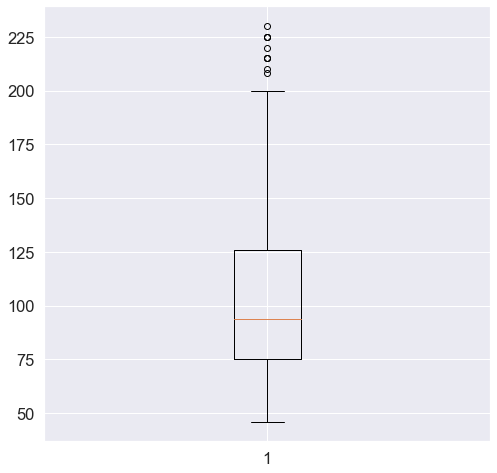

In [51]:
# plotting boxplot to check where outliers are:
plt.figure(figsize=(8,8))
plt.boxplot(hp);

#### Outliers are present above minimum horsepower. hence need to remove outliers.

C:\Users\aditi\anaconda_7june\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

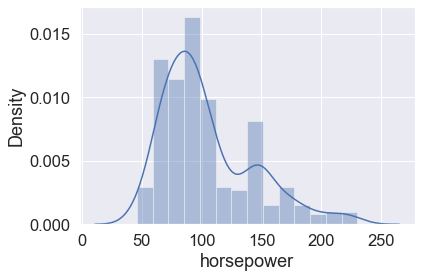

In [52]:
# distplot before outliers:
sys.distplot(auto['horsepower'])

#### The peak is pointy. The distribution is leptokurtic in nature. Right side tail is longer than left side

In [53]:
# removing outliers:
hp.drop(index=hp[(hp<lb_h)|(hp>ub_h)].index, inplace=True)


Text(0.5, 1.0, 'BOX PLOT OF HORSEPOWER')

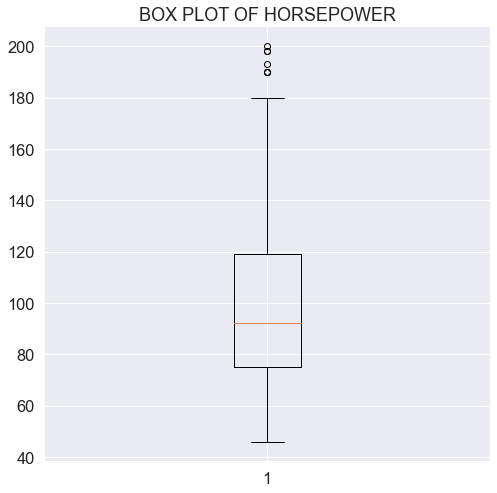

In [54]:
# checking wheather outliers are removed or not:
plt.figure(figsize=(8,8))
plt.boxplot(hp);
plt.title('BOX PLOT OF HORSEPOWER')

#### outliers are still present.

In [55]:
#calculating skewness of horsepower after removing outliers:
hp.skew()

0.8612205021180016

#### Horsepower is moderately skewed and positive. hence right side tail is longer than left side.

In [56]:
# Calculating Kurtosis of horsepower after removing outliers:
hp.kurt()

-0.02939487672281338

#### kurtosis is negative and approximately zero. hence it is slighly flat and it is leptokurtic distribution.

C:\Users\aditi\anaconda_7june\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'HORSEPOWER VS DENSITY'}, xlabel='horsepower', ylabel='Density'>

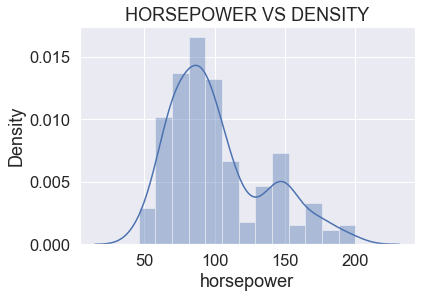

In [57]:
# plotting distplot of horsepower:
plt.title('HORSEPOWER VS DENSITY')
sys.distplot(hp)

#### The peak is flat. The distribution is leptokurtic in nature. Right side tail is longer than left side

## DISPLACEMENT 

In [58]:
#displaying displacement from given data:
displacement = auto['displacement']
displacement

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
392    140.0
393     97.0
394    135.0
395    120.0
396    119.0
Name: displacement, Length: 392, dtype: float64

In [59]:
# displaying index of displacement:
index_d = auto['displacement'].index
index_d

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
           dtype='int64', length=392)

In [60]:
# describing displacement of car:
displacement.describe().astype(int)

count    392
mean     194
std      104
min       68
25%      105
50%      151
75%      275
max      455
Name: displacement, dtype: int32

#### Displacement:
#### Minimum displacement by any car is 68 units.
#### Maximum displacement by any car is 455 units.
#### Mean of displacement by any car is 193.
#### From mean, displacement is deviated by 104.

### Quantiles of displacement:

In [61]:
# quantile of 25% of displacement:
qd1= displacement.quantile(0.25)
qd1

105.0

#### Quantile of 25% of displacement is 105

In [62]:
# quantile of 50% of displacement:
qd2= displacement.quantile(.50)
qd2

151.0

#### Quantile of 50% of displacement is 151

In [63]:
# quantile of 75% of displacement:
qd3= displacement.quantile(0.75)
qd3

275.75

#### Quantile of 75% of displacement is 275.75

In [64]:
# inter-quantile region of displacement:
IQR_D = qd3-qd1
IQR_D

170.75

#### inter-quantile region of displacement is 124.75

In [65]:
#lower bound of displacement:
lb_d = qd1-(1.5*IQR_D)
lb_d

-151.125

#### lower bound of displacement is -36.125

In [66]:
#upper bound of displacement:
ub_d = qd3 + (1.5*IQR_D)
ub_d

531.875

#### upper bound of displacement is 462.875

In [67]:
# checking outliers:
var_d = displacement[(displacement < lb_d) | (displacement > ub_d)].index

var_d

Int64Index([], dtype='int64')

#### empty brackets indicates no outliers

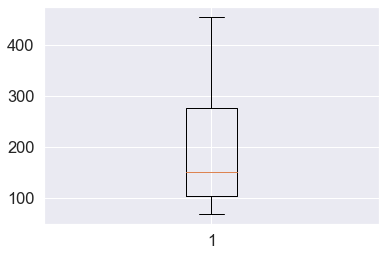

In [68]:
# boxplot of displacement with no outliers:
plt.boxplot(displacement);

#### No outliers present in displacement.

In [69]:
# calculating skewness of displacement:
displacement.skew()

0.7016690996581041

#### displacement is moderately skewed.positive skewness indicates tail at right side is a bit longer. hence it is assymetrical distribution.

In [70]:
# calculating kurtosis of displacement:
displacement.kurt()

-0.778316930213621

#### displacement is platykurtic in nature and negative kurtosis indicates peak is flat.

C:\Users\aditi\anaconda_7june\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

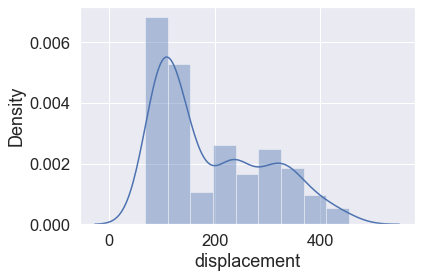

In [71]:
# plotting distplot of displacement:
sys.distplot(displacement)

#### distribution is platykurtic (assymetric) distribution. right side tail is longer as the skewness is positive.

## MILES PER GALLON(MPG)

In [72]:
#displaying miles per gallon from given data:
mpg = auto['mpg']
mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 392, dtype: float64

In [73]:
# displaying index of miles per gallon:
index_d = auto['mpg'].index
index_d

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
           dtype='int64', length=392)

In [74]:
#describing miles per gallon of car:
auto['mpg'].describe().astype(int)

count    392
mean      23
std        7
min        9
25%       17
50%       22
75%       29
max       46
Name: mpg, dtype: int32

#### Miles per gallon:
#### Maximum miles per gallon covered by any car is 46 units.
#### Minimum miles per gallon covered by any car is 9 units
#### Mean of miles per gallon is 23.
#### From mean position, miles per gallon is deviated by 7.

### Quantiles of miles per gallon:

In [75]:
# quantile of 25% of miles per gallon:
qm1 = mpg.quantile(0.25)
qm1

17.0

#### Quantile of 25% of mpg is 17

In [76]:
# quantile of 50% of miles per gallon:
qm2 = mpg.quantile(0.50)
qm2

22.75

#### Quantile of 50% of miles per gallon is 22.75

In [77]:
# quantile of 25% of miles per gallon:
qm3 = mpg.quantile(0.75)
qm3

29.0

#### Quantile of 75% of miles per gallon is 29.

In [78]:
# inter-quantile region of miles per gallon:
IQR_M = qm3-qm1
IQR_M

12.0

#### Inter-quantile region of miles per gallon is 12.

In [79]:
# lower bound of miles per gallon:
lb_m = qm1-(1.5*IQR_M)
lb_m

-1.0

#### Lower bound of miles per gallon is -1

In [80]:
# upper bound of miles per gallon:
ub_m = qm3+(1.5*IQR_M)
ub_m

47.0

#### Upper bound of miles per gallon is 47

In [81]:
# checking outliers:
var_m = mpg[(mpg < lb_m) | (mpg > ub_m)].index

var_m

Int64Index([], dtype='int64')

#### Empty brackets indicated no outliers.

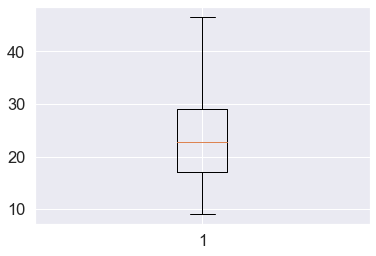

In [82]:
plt.boxplot(mpg);

#### no outliers in miles per gallon.

In [83]:
# calculating skewness of miles per gallon:
mpg.skew()

0.45709232306041025

#### mpg is fairly skewed. Positive skewness indicates tail at right side is a bit longer. hence it is assymetrical distribution.

In [84]:
# calculating kurtosis of miles per gallon:
mpg.kurt()

-0.5159934946351457

#### mpg is platykurtic in nature and negative kurtosis indicates peak is flat.

C:\Users\aditi\anaconda_7june\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

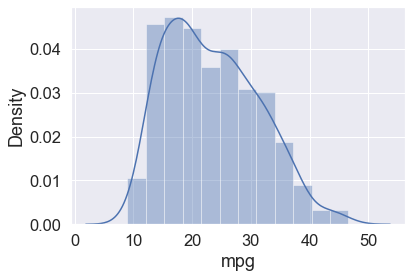

In [85]:
# plotting distplot of miles per gallon:
sys.distplot(mpg)

#### Distribution is platykurtic (assymetric) in nature. Right side tail is longer as the skewness is positive.

## WEIGHT:

In [86]:
#displaying weight from given data:
weight = auto['weight']
weight

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
392    2790
393    2130
394    2295
395    2625
396    2720
Name: weight, Length: 392, dtype: int64

In [87]:
# displaying index of weight from given data:
index_w = auto['weight']
index_w

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
392    2790
393    2130
394    2295
395    2625
396    2720
Name: weight, Length: 392, dtype: int64

In [88]:
# describing weight:
auto['weight'].describe().astype(int)

count     392
mean     2977
std       849
min      1613
25%      2225
50%      2803
75%      3614
max      5140
Name: weight, dtype: int32

#### Weight:
#### Minimum weight of any car is 1613 units.
#### Maximum weight of any car is 5140 units.
#### Mean of all car weight is 2970.
#### From mean, car weight is deviated by 847.

### Quantiles of weight:

In [89]:
# quantile of 25% of weight:
qw1 = weight.quantile(0.25)
qw1

2225.25

#### quantile of 25% of weight is 2225.25

In [90]:
# quantile of 50% of weight:
qw2 = weight.quantile(0.50)
qw2

2803.5

#### quantile of 50% of weight is 2803.5

In [91]:
# quantile of 75% of weight:
qw3 = weight.quantile(0.75)
qw3

3614.75

#### quantile of 75% of weight is 3614.75

In [92]:
# Inter-quantile region of weight:
IQR_W = qw3-qw1
IQR_W

1389.5

#### Inter-quantile of weight is 1389.5

In [93]:
# Lower bound of weight:
lb_w = qw1 - (1.5*IQR_W)
lb_w

141.0

#### Lower bound of weight is 141

In [94]:
# Upper bound of weight:
ub_w = qw3 + (1.5*IQR_W)
ub_w

5699.0

#### Upper bound of weight is 5699

In [95]:
# checking outliers:
var_w = weight[(weight < lb_w) | (weight > ub_w)].index
var_w

Int64Index([], dtype='int64')

In [96]:
#### No outliers are present in the data.

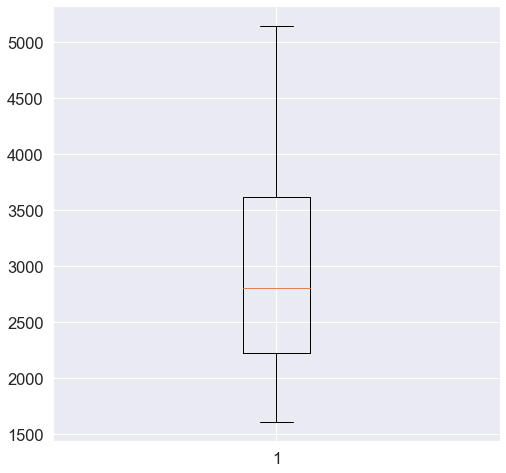

In [97]:
plt.figure(figsize= (8,8))
plt.boxplot(weight);

### no outliers are present

In [98]:
# skewness of weight:
weight.skew()

0.5195856740558396

#### Weight is moderately skewed. Positive skewness indicates tail at right side is a bit longer. Hence it is assymetrical distribution.

In [99]:
# kurtosis of weight:
weight.kurt()

-0.809259388327968

#### Weight is platykurtic and negative kurtosis indicates peak is flat.

C:\Users\aditi\anaconda_7june\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

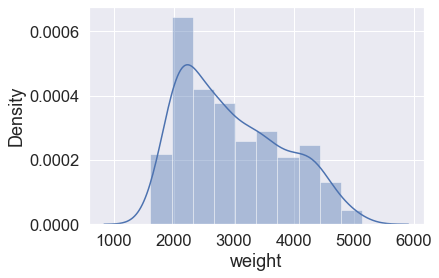

In [100]:
# plotting distplot of weight:
sys.distplot(weight)

#### Distribution is platykurtic (assymetric) in nature. Right side tail is longer as the skewness is positive.

### 

### LINEAR REGRESSION:

In [101]:
# summarizing the data with rp.summary:
rp.summary_cont(auto[['mpg','cylinders', 'displacement', 'horsepower', 
                    'weight', 'acceleration', 'year', 'origin']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,mpg,392.0,23.4459,7.8050,0.3942,22.6709,24.2210
1,cylinders,392.0,5.4719,1.7058,0.0862,5.3026,5.6413
2,displacement,392.0,194.4120,104.6440,5.2853,184.0208,204.8032
3,horsepower,392.0,104.4694,38.4912,1.9441,100.6472,108.2916
4,weight,392.0,2977.5842,849.4026,42.9013,2893.2381,3061.9303
5,acceleration,392.0,15.5413,2.7589,0.1393,15.2674,15.8153
6,year,392.0,75.9796,3.6837,0.1861,75.6138,76.3454
7,origin,392.0,1.5765,0.8055,0.0407,1.4965,1.6565


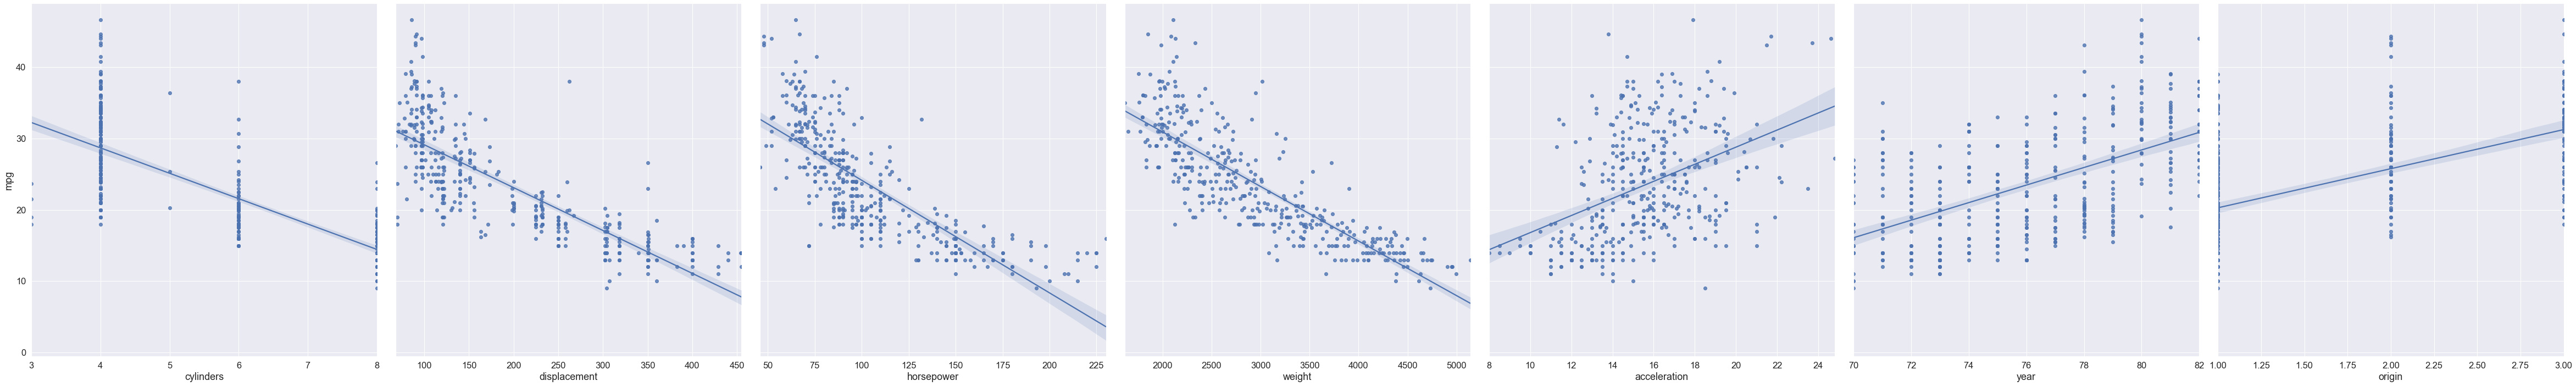

In [102]:
# Visualising the relationship between features and responses
sys.set(style='white', color_codes=True)
sys.set(font_scale=1.5)

sys.pairplot(auto,
            x_vars=['cylinders', 'displacement', 'horsepower', 
                    'weight', 'acceleration', 'year', 'origin'],
            y_vars='mpg',
            height= 10,
            aspect=0.95,
            kind='reg')

In [103]:
#list of feature names for feature column:
feature_cols=['cylinders', 'displacement', 'horsepower', 
                    'weight', 'acceleration', 'year', 'origin']
print(type(feature_cols))

#subset of auto dataframe:
X= auto[feature_cols]

#selecting a series for dataframe:
y= auto['mpg']
print(type(y))

<class 'list'>
<class 'pandas.core.series.Series'>


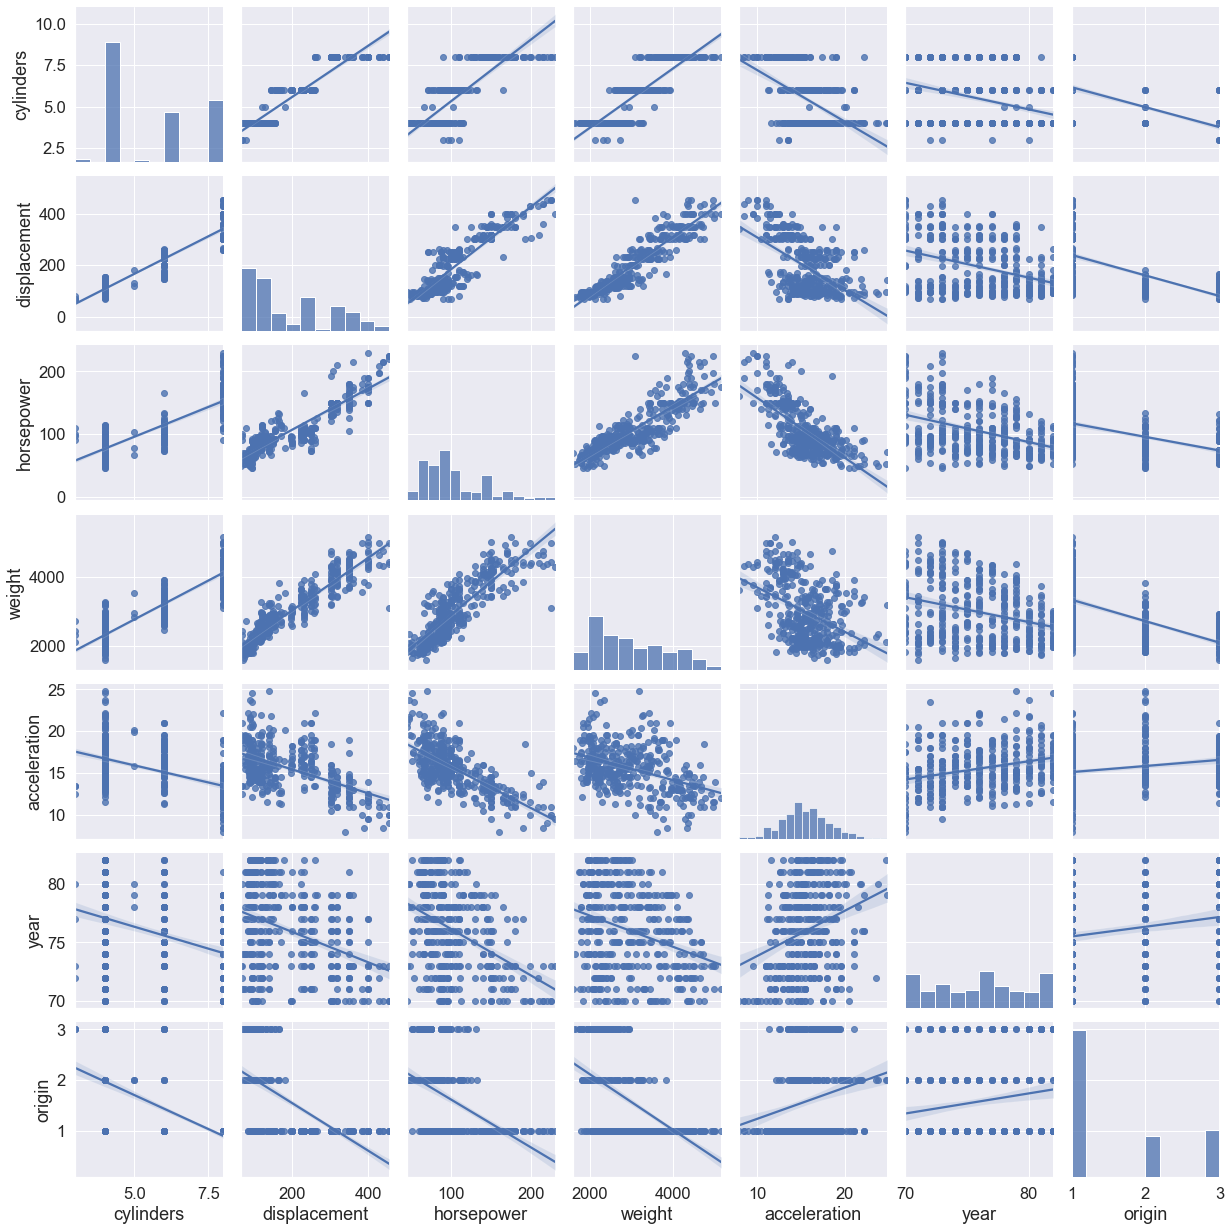

In [104]:
# plotting pairplot of X of regression kind:
sys.pairplot(X,kind='reg')

In [105]:
# Corelation between X and y: 
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


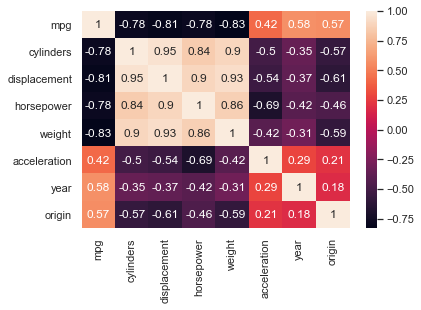

In [106]:
# plotting correlation between X and y with the help of heatmap:
sys.set(font_scale=1)
sys.heatmap(auto.corr(), annot = True)

plt.show()

In [107]:
# Creating a model of data:
model = smf.ols("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin ", data= auto).fit()

In [108]:
#print the coefficients:
model.params

Intercept      -17.218435
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.006474
acceleration     0.080576
year             0.750773
origin           1.426140
dtype: float64

In [109]:
# Creating the summary of the model:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          2.04e-139
Time:                        21:05:07   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

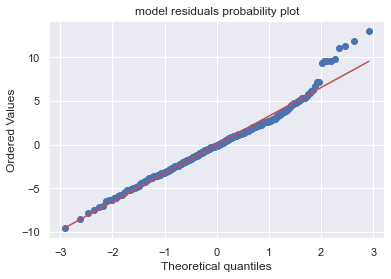

In [110]:
# Diagnosing Normality of the model
stats.probplot(model.resid, plot= plt)
plt.title("model residuals probability plot");

#### The residuals which will be represented as dots (in blue) fall on the red line. This plot indicates that the model’s residuals are normally distributed.

In [111]:
# Kolmogorov-Smirnov test (for normality)
stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.26378409799336416, pvalue=1.4607824270648814e-24)

#### The test is significant which indicates that the model’s residuals are normally distributed.
#### ACCEPT the NULL HYPOTHESIS (that the residuals are NOT normally distributed)

# 


## Diagnosing Homoscedasticity

In [112]:
# Bruesch-Pagan test:
name = ['Lagrange multiplier statistic',
       'p-value',
       'f-value',
       'f p-value']

test = sms.het_breuschpagan(model.resid, model.model.exog)
test

pd.DataFrame(name, test)

,0
29.476202,Lagrange multiplier statistic
0.000118,p-value
4.460342,f-value
0.000087,f p-value


#### Since our p-value is less than 0.05, this indicates that heteroscedasticity is present, and we reject the null hypothesis of homoscedasticity.

In [113]:
# splitting X abd y into training and testing sets:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.3)

In [114]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(274, 7)
(274,)
(118, 7)
(118,)


#### y_train and y_test needs to be reshaped

In [115]:
# reshaping y_train values:
y_train.values.reshape(274,1)

array([[24. ],
       [27.5],
       [27. ],
       [21.5],
       [20.2],
       [25. ],
       [28. ],
       [26. ],
       [10. ],
       [27.2],
       [19. ],
       [14. ],
       [14. ],
       [32.8],
       [36. ],
       [15. ],
       [18.5],
       [27. ],
       [19. ],
       [27. ],
       [17. ],
       [18.1],
       [16.5],
       [12. ],
       [32. ],
       [28. ],
       [13. ],
       [26. ],
       [36. ],
       [18. ],
       [31. ],
       [17. ],
       [14. ],
       [25.5],
       [19. ],
       [23. ],
       [44.6],
       [20. ],
       [11. ],
       [29. ],
       [26.5],
       [13. ],
       [15. ],
       [26.8],
       [32.7],
       [15. ],
       [16. ],
       [23.9],
       [14. ],
       [16. ],
       [13. ],
       [31. ],
       [27.9],
       [16. ],
       [20. ],
       [34.3],
       [27. ],
       [22.4],
       [29. ],
       [37.3],
       [32.2],
       [21. ],
       [19. ],
       [23. ],
       [22. ],
       [31. ],
       [34

#### Data is reshaped.

In [116]:
# Checking shape of y_test values:
y_test.shape

(118,)

#### y_test need to be reshaped.

In [117]:
# reshaping y_test values:
y_test.values.reshape(118,1)

array([[20. ],
       [26. ],
       [31.5],
       [20.2],
       [30. ],
       [14. ],
       [36. ],
       [16. ],
       [27. ],
       [19. ],
       [19. ],
       [25.4],
       [20.8],
       [22. ],
       [29. ],
       [30.9],
       [14. ],
       [32. ],
       [18.6],
       [25.5],
       [13. ],
       [22. ],
       [16. ],
       [24. ],
       [18. ],
       [31. ],
       [29.5],
       [15.5],
       [26. ],
       [20. ],
       [34.4],
       [17.6],
       [15. ],
       [15. ],
       [36.1],
       [13. ],
       [24. ],
       [18. ],
       [18. ],
       [13. ],
       [24. ],
       [18. ],
       [15. ],
       [16. ],
       [16. ],
       [29. ],
       [19.4],
       [18. ],
       [27. ],
       [20. ],
       [17.6],
       [27. ],
       [28. ],
       [14. ],
       [20.3],
       [25.4],
       [23.9],
       [31. ],
       [24. ],
       [15. ],
       [12. ],
       [38. ],
       [27.2],
       [34.7],
       [13. ],
       [36. ],
       [14

#### y_test is reshaped.

In [118]:
# 1st 10 rows of X_train:
X_train.head(10)

,cylinders,displacement,horsepower,weight,acceleration,year,origin
171,4,134.0,96,2702,13.5,75,3
267,4,134.0,95,2560,14.2,78,3
391,4,151.0,90,2950,17.3,82,1
243,3,80.0,110,2720,13.5,77,3
251,8,302.0,139,3570,12.8,78,1
180,4,121.0,115,2671,13.5,75,2
367,4,112.0,88,2605,19.6,82,1
19,4,97.0,46,1835,20.5,70,2
26,8,307.0,200,4376,15.0,70,1
299,4,141.0,71,3190,24.8,79,2


In [119]:
# 1st 10 rows of y_train:
y_train.head(10)

171    24.0
267    27.5
391    27.0
243    21.5
251    20.2
180    25.0
367    28.0
19     26.0
26     10.0
299    27.2
Name: mpg, dtype: float64

In [120]:
# checking X_train columns:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [121]:
#creating classifier linear regression:
linreg1 = LinearRegression()

In [122]:
# using fit method to train the model:
linreg1 = linreg1.fit(X_train, y_train)  
linreg1

LinearRegression()

In [123]:
linreg1.predict(X_test)

array([20.71583956, 28.15422546, 30.94236911, 24.79623704, 27.0195287 ,
       11.99277183, 34.31707133, 18.57939432, 28.032728  , 21.85178276,
       20.24216229, 28.31130945, 24.2700595 , 26.2972445 , 30.43612975,
       27.9878452 , 10.11329081, 31.36088971, 20.88046345, 24.51879206,
        6.40131585, 21.22564443, 16.41105372, 27.48729351, 19.87677811,
       27.9990026 , 30.28872047, 19.48048342, 26.00784953, 20.56426275,
       31.81154683, 20.63606955, 22.13183306, 13.94996691, 34.43855241,
       18.05635537, 22.00411339, 27.07143949, 18.15401022, 11.3440506 ,
       26.22245875, 21.75855781, 18.84953637, 14.0291218 , 20.24400567,
       29.75551618, 24.09570087, 21.60056492, 28.03802481, 23.29286845,
       24.54904669, 25.36407664, 27.57806154, 13.28160084, 25.34943283,
       24.43586886, 24.26261061, 30.4343015 , 23.45211012, 10.45164862,
        9.71803165, 35.85818933, 30.44382055, 30.74583588, 13.0300035 ,
       30.24183413, 15.66778395, 30.39128912, 20.21285747, 18.25

In [124]:
# displaying coefficients of linreg1:
linreg1.coef_

array([-0.3744712 ,  0.02517938, -0.03258995, -0.00642647,  0.16511297,
        0.73482302,  1.61863657])

In [125]:
#checking the shape of linreg1 cofficients:
linreg1.coef_.shape

(7,)

In [126]:
# transposing linreg1 coefficients:
np.transpose(linreg1.coef_).shape

(7,)

#### transposed linreg1

In [127]:
# concating X_train columns and linreg1 transposed coefficients:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(linreg1.coef_))], axis = 1)
coefficients

,0,0
0,cylinders,-0.374471
1,displacement,0.025179
2,horsepower,-0.032590
3,weight,-0.006426
4,acceleration,0.165113
5,year,0.734823
6,origin,1.618637


#### concated X_train columns and linreg1 transposed coefficients

In [128]:
# intercept of linreg1:
linreg1.intercept_

-17.711803529587975

#### hence, intercepted linreg1

In [129]:
# To predict the values of y on the test set we use linreg1.predict( )
y_pred = linreg1.predict(X_test)
y_pred

array([20.71583956, 28.15422546, 30.94236911, 24.79623704, 27.0195287 ,
       11.99277183, 34.31707133, 18.57939432, 28.032728  , 21.85178276,
       20.24216229, 28.31130945, 24.2700595 , 26.2972445 , 30.43612975,
       27.9878452 , 10.11329081, 31.36088971, 20.88046345, 24.51879206,
        6.40131585, 21.22564443, 16.41105372, 27.48729351, 19.87677811,
       27.9990026 , 30.28872047, 19.48048342, 26.00784953, 20.56426275,
       31.81154683, 20.63606955, 22.13183306, 13.94996691, 34.43855241,
       18.05635537, 22.00411339, 27.07143949, 18.15401022, 11.3440506 ,
       26.22245875, 21.75855781, 18.84953637, 14.0291218 , 20.24400567,
       29.75551618, 24.09570087, 21.60056492, 28.03802481, 23.29286845,
       24.54904669, 25.36407664, 27.57806154, 13.28160084, 25.34943283,
       24.43586886, 24.26261061, 30.4343015 , 23.45211012, 10.45164862,
        9.71803165, 35.85818933, 30.44382055, 30.74583588, 13.0300035 ,
       30.24183413, 15.66778395, 30.39128912, 20.21285747, 18.25

#### Hence predicted values of y.

In [130]:
# Errors are the difference between observed and predicted values.
y_error = y_test - y_pred
y_error

125   -0.715840
142   -2.154225
278    0.557631
254   -4.596237
328    2.980471
         ...   
335    5.555571
15     2.659845
34    -0.534481
173   -3.044626
360    3.797946
Name: mpg, Length: 118, dtype: float64

#### Hence, errors has been calculated

In [131]:
# print the p-values for the model coefficients
model.pvalues

Intercept       2.401841e-04
cylinders       1.277965e-01
displacement    8.444649e-03
horsepower      2.196328e-01
weight          7.874953e-21
acceleration    4.154780e-01
year            3.055983e-39
origin          4.665681e-07
dtype: float64

#### p-values of model coefficients aren't giving the clear view of hypothesis testing, hence create the for loop.

In [132]:
# for loop for checking the p-values condition (hypothesis testing):
for i in model.pvalues:
    print(i)
    if i < 0.05:
        print("TRUE reject null")
    else:
        print("False accept null")

0.00024018409897104526
TRUE reject null
0.1277964675577367
False accept null
0.00844464948162475
TRUE reject null
0.2196328232263538
False accept null
7.874953333196628e-21
TRUE reject null
0.415478017837248
False accept null
3.055982581074993e-39
TRUE reject null
4.665680973942778e-07
TRUE reject null


#### some of the columns has been rejected and some has been accepted.

In [133]:
# maximum of p values in given model:
max(model.pvalues)

0.415478017837248

#### This is the maximum of p value of accepting the null value.

In [134]:
# Inserting intercept into feature column:
feature_cols_added_intercept = []
feature_cols_added_intercept = feature_cols.copy()
feature_cols_added_intercept.insert(0, 'Intercept')
feature_cols_added_intercept

['Intercept',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin']

#### Hence, inserted intercept in the featured column

In [135]:
# ziping feature column and p values of model:
list(zip(feature_cols_added_intercept, model.pvalues))

[('Intercept', 0.00024018409897104526),
 ('cylinders', 0.1277964675577367),
 ('displacement', 0.00844464948162475),
 ('horsepower', 0.2196328232263538),
 ('weight', 7.874953333196628e-21),
 ('acceleration', 0.415478017837248),
 ('year', 3.055982581074993e-39),
 ('origin', 4.665680973942778e-07)]

#### here the clear overview can be seen for the p-value condition. but manually we cant say, hence again creating for loop.

In [136]:
# 'for loop' for checking the p-values condition (hypothesis testing):
for each in list(zip(feature_cols_added_intercept, model.pvalues)):
    if each[1] <=0.05:
        print('REJECT the NULL hypothesis: the col {} has strong relationship with response variable'.format({each[0]}))
    else:
        print('ACCEPT THE NULL HYPOTHESIS: the col {} has no relationship with response variable'.format({each[0]}))

REJECT the NULL hypothesis: the col {'Intercept'} has strong relationship with response variable
ACCEPT THE NULL HYPOTHESIS: the col {'cylinders'} has no relationship with response variable
REJECT the NULL hypothesis: the col {'displacement'} has strong relationship with response variable
ACCEPT THE NULL HYPOTHESIS: the col {'horsepower'} has no relationship with response variable
REJECT the NULL hypothesis: the col {'weight'} has strong relationship with response variable
ACCEPT THE NULL HYPOTHESIS: the col {'acceleration'} has no relationship with response variable
REJECT the NULL hypothesis: the col {'year'} has strong relationship with response variable
REJECT the NULL hypothesis: the col {'origin'} has strong relationship with response variable


#### Columns that rejected null hypothesis: Intercept, displacement, weight, year, origin.
             hence these columns has strong relationship with response variable.
#### Columns that accepted null hypothesis: cylinders, horsepower, acceleration.
             hence these columns has no relationship with response variable.

In [137]:
# print the R-squared value for the model
model.rsquared

0.8214780764810599

### Model evaluation metrics for regression

In [138]:
# y-intercept of linreg1:
print('y-intercept : ', linreg1.intercept_)

y-intercept :  -17.711803529587975


#### Hence the y-intercept of linreg1 is -17.711

In [139]:
# beta coefficients of linreg1:
print('beta coefficients : ', linreg1.coef_)

beta coefficients :  [-0.3744712   0.02517938 -0.03258995 -0.00642647  0.16511297  0.73482302
  1.61863657]


#### Hence, beta coefficients of linreg1 are above.

In [140]:
# Mean Abslute Error of linreg1:
print('Mean Abs Error MAE : ', metrics.mean_absolute_error(y_test, y_pred))

Mean Abs Error MAE :  2.577105635399067


#### Hence, Mean Absolute Error is 2.577

In [141]:
# Mean Square Error:
print('Mean Sq  Error MSE : ', metrics.mean_squared_error(y_test, y_pred))

Mean Sq  Error MSE :  10.513396137620628


#### Hence, Mean Square Error is 10.5133

In [142]:
# Root Mean Square Error:
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Sq Error RMSE :  3.2424367592322643


#### Root Mean Square Error is 3.2424

In [143]:
# R2 value:
print('r2 value : ', metrics.r2_score(y_test, y_pred))

r2 value :  0.7997486706042077


#### R2 value is 0.7997

In [144]:
# statsmodel with rejected null hypothesis columns:
model_1= smf.ols(formula="mpg ~ displacement + weight + year + origin ", data=auto).fit()

# print the R-squared value for the model_1:
print(model_1.rsquared, model.rsquared_adj)

# statsmodel with original model:
model_2 = smf.ols(formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin ", 
              data=auto).fit()
# print the R-squared value for the model_1:
print(model_2.rsquared, model.rsquared_adj)

# print the R-squared value for the model
print("cylinders:",model_2.rsquared, model_2.rsquared_adj)
print("acceleration:",model_2.rsquared, model_2.rsquared_adj)
print('horsepower:',model_2.rsquared, model_2.rsquared_adj)

0.8180977417246627 0.8182237705835792
0.8214780764810599 0.8182237705835792
cylinders: 0.8214780764810599 0.8182237705835792
acceleration: 0.8214780764810599 0.8182237705835792
horsepower: 0.8214780764810599 0.8182237705835792


#### R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

#### Adjusted R-square is constant throughout the model. 


In [145]:
# Running linear regression using statsmodels:
X_train = sa.add_constant(X_train) 
X_test  = sa.add_constant(X_test) 

In [146]:
# shape of X_train, y_train:
X_train.shape, y_train.shape

((274, 8), (274,))

In [147]:
type(auto.columns)

pandas.core.indexes.base.Index

In [148]:
# defining linreg2 with the help of smf.ols:
linreg2 = smf.ols(formula = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin " , data = auto)
linreg2

In [149]:
# head of X_train:
X_train.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
171,1.0,4,134.0,96,2702,13.5,75,3
267,1.0,4,134.0,95,2560,14.2,78,3
391,1.0,4,151.0,90,2950,17.3,82,1
243,1.0,3,80.0,110,2720,13.5,77,3
251,1.0,8,302.0,139,3570,12.8,78,1


In [150]:
# displaying y_train:
y_train

171    24.0
267    27.5
391    27.0
243    21.5
251    20.2
       ... 
347    37.0
364    26.6
325    44.3
282    22.3
8      14.0
Name: mpg, Length: 274, dtype: float64

In [151]:
# Linear regression can be run by using sa.OLS:
linreg2 = sa.OLS(y_train, X_train).fit()
linreg2

In [152]:
# summary of linreg2:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           7.34e-97
Time:                        21:05:29   Log-Likelihood:                -720.17
No. Observations:                 274   AIC:                             1456.
Df Residuals:                     266   BIC:                             1485.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.7118      5.612     -3.156      0.002     -28.762      -6.662
cylinders       -0.3745      0.399     -0.940      0.348      -1.159       0.410
displacement     0.0252      0.009      2.777      0.006       0.007       0.043
horsepower      -0.0326      0.017     -1.957      0.051      -0.065       0.000
weight          -0.0064      0.001     -8.251      0.000      -0.008      -0.005
acceleration     0.1651      0.118      1.405      0.161      -0.066       0.396
year             0.7348      0.063     11.728      0.000       0.611       0.858
origin           1.6186      0.332      4.878      0.000       0.965       2.272
==============================================================================
Omnibus:                       25.091   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.308
Skew:                           0.617   Prob(JB):                     2.15e-08
Kurtosis:                       4.253   Cond. No.                     8.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
X_train.columns

Index(['const', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

## Detecting and Removing Multicollinearity

In [154]:
# selecting the range:
[i for i in range(X_train.shape[1])]

[0, 1, 2, 3, 4, 5, 6, 7]

In [155]:
# variance inflation factor for a integer in range:
variance_inflation_factor(X_train.values, 2) 

22.056346462464866

In [156]:
# variance inflation factor for a range:
[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

[745.8335860111331,
 11.398263158609154,
 22.056346462464866,
 10.196381179538657,
 10.847080747359017,
 2.555021893358731,
 1.252210420117701,
 1.7510734532392658]

In [157]:
# defining vif:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [158]:
vif[1:]

[11.398263158609154,
 22.056346462464866,
 10.196381179538657,
 10.847080747359017,
 2.555021893358731,
 1.252210420117701,
 1.7510734532392658]

In [159]:
# Returns indices of the max element of the array in a particular axis:
np.argmax(vif[1:])

1

In [160]:
# checking the length of vif:
len(vif)

8

#### the length of variance inflation factor is 8.

In [161]:
#creating a dataframe to remove collinear variables:
a= pd.DataFrame()
a

""


#### Created data frame to remove collinear variable:

In [162]:
#creating a function to remove the collinear variables
def calculate_vif(x):
    thresh = 10
    output = pd.DataFrame()
    k = x.shape[1]
    dropped_columns = []
    vif=[variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    
    for i in range(1,k):
        print("==> Iteration no.", i)
        print(vif)
        
        # RETURN INDICES OF MAX ELEMENT OF THE ARRAY IN A PARTICULAR AXIS.
        a = np.argmax(vif)
        
        print('Max VIF is for variable no.:',a)
        
        if vif[a] <= thresh :
            break
        if i==1:
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1:
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        
        dropped_columns.append(X_train.columns[a])
        
        print(dropped_columns)
    return(output, dropped_columns)

In [163]:
# performing iterations:
train_out, dropped_columns = calculate_vif(X_train) 

==> Iteration no. 1
[745.8335860111331, 11.398263158609154, 22.056346462464866, 10.196381179538657, 10.847080747359017, 2.555021893358731, 1.252210420117701, 1.7510734532392658]
Max VIF is for variable no.: 0
['const']
==> Iteration no. 2
[117.63621630131608, 94.80757926006876, 69.3923623431544, 134.07055468183543, 68.63843802948894, 119.09427433801984, 8.292449395143672]
Max VIF is for variable no.: 3
['const', 'horsepower']
==> Iteration no. 3
[116.18756743925765, 81.54041762375337, 55.56504394548114, 55.801258886256, 119.08901712579028, 8.17835144565855]
Max VIF is for variable no.: 4
['const', 'horsepower', 'weight']
==> Iteration no. 4
[106.79907199586206, 75.97828896049653, 44.78149642953716, 16.708775726981646, 7.465060346550492]
Max VIF is for variable no.: 0
['const', 'horsepower', 'weight', 'const']
==> Iteration no. 5
[32.38684919137678, 43.84409196048599, 9.780649036709525, 7.109920475726767]
Max VIF is for variable no.: 1
['const', 'horsepower', 'weight', 'const', 'cylinde

#### Max VIF is for variable no is 4
#### 6 iterations are performed.

In [164]:
# Displaying the dropped columns:
dropped_columns

['const', 'horsepower', 'weight', 'const', 'cylinders']

#### the dropped columns are const, horsepower, weight, cylinders.

In [165]:
X_test.drop(dropped_columns, axis = 1, inplace = True)

#### Dropping the columns permanently.

In [166]:
# displaying the train_out data:
train_out.head()

,displacement,acceleration,origin
171,134.0,13.5,3
267,134.0,14.2,3
391,151.0,17.3,1
243,80.0,13.5,3
251,302.0,12.8,1


#### train out data has displacement, acceleration, and origin columns.

In [167]:
# adding constant to train_out data:
train_out = sa.add_constant(train_out) 

X_test    = sa.add_constant(X_test)



#### added constant to train out data.

In [168]:
# displaying the train_out data:
train_out

,const,displacement,acceleration,origin
171,1.0,134.0,13.5,3
267,1.0,134.0,14.2,3
391,1.0,151.0,17.3,1
243,1.0,80.0,13.5,3
251,1.0,302.0,12.8,1
...,...,...,...,...
347,1.0,85.0,19.4,3
364,1.0,350.0,19.0,1
325,1.0,90.0,21.7,2
282,1.0,140.0,17.3,1


In [169]:
# using fit method on trained model:
linreg3 = sa.OLS(y_train, train_out).fit()

In [170]:
# view the summary of trained model:
linreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     175.8
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           3.50e-63
Time:                        21:05:35   Log-Likelihood:                -810.74
No. Observations:                 274   AIC:                             1629.
Df Residuals:                     270   BIC:                             1644.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           28.5323      2.848     10.019      0.000      22.925      34.139
displacement    -0.0509      0.004    -12.380      0.000      -0.059      -0.043
acceleration     0.1645      0.127      1.299      0.195      -0.085       0.414
origin           1.5060      0.449      3.356      0.001       0.623       2.389
==============================================================================
Omnibus:                       26.594   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.168
Skew:                           0.617   Prob(JB):                     1.89e-09
Kurtosis:                       4.412   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Checking normality of residuals

In [171]:
# Perform a Shapiro-Wilk Test:

stats.shapiro(linreg3.resid)

ShapiroResult(statistic=0.9700528979301453, pvalue=1.7096039300668053e-05)

#### test statistic is 0.970052 and the corresponding p-value is 1.70960 .
#### p- value is greater than 0.05. hence reject alternate hypothesis.